In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
consumer=pd.read_csv('../data/Consumer_Clean.csv',usecols=['Product','Consumer_Complaint','Product_id'])

In [3]:
consumer.head()

,Product,Consumer_Complaint,Product_id
0,Debt collection,Midland Funding had posted a debt under a diff...,7
1,Debt collection,XXXX XXXX XXXX and Nationstar Mortgage has bee...,7
2,Debt collection,Complaint against - XXXX XXXX -- - A company c...,7
3,Debt collection,"The bill should only be XXXX. XXXX in XXXX, FL...",7
4,Debt collection,I have been disputing an account with XXXX XXX...,7


In [4]:
consumer.loc[consumer['Product']=='Credit reporting, credit repair services, or other personal consumer reports', 'Product']='Credit_Reporting-Credit_Repair'

# Naive Bayes

## Multinomial Dataset training using the MultinomialNB

In [5]:
cv_counts=CountVectorizer(stop_words='english', binary=False)

In [6]:
X_counts=cv_counts.fit_transform(consumer.Consumer_Complaint).toarray()

In [7]:
X_counts.shape

(5000, 14177)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_counts, consumer.Product, test_size=0.2, random_state=123)

In [9]:
clf_Multinomial=MultinomialNB()

In [10]:
clf_Multinomial.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [11]:
print('The Train score for Multinomial is {0}'.format(clf_Multinomial.score(X_train,y_train)))

The Train score for Multinomial is 0.87075


In [12]:
print('The Test score for Multinomial is {0}'.format(clf_Multinomial.score(X_test,y_test)))

The Test score for Multinomial is 0.745


### Verifying with an example 

In [13]:
clf_Multinomial.predict(cv_counts.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."]))

array(['Debt collection'], dtype='<U30')

In [14]:
clf_Multinomial.predict(cv_counts.transform(["I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"]))

array(['Credit reporting'], dtype='<U30')

## Binary Dataset training using the BernoulliNB

In [15]:
X_counts_binary=X_counts>0

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_counts_binary, consumer.Product, test_size=0.2, random_state=123)

In [17]:
clf_binary=BernoulliNB()

In [18]:
clf_binary.fit(X_train,y_train)
print('The Train score for Binary is {0}'.format(clf_binary.score(X_train,y_train)))

The Train score for Binary is 0.76625


In [19]:
print('The Test score for Binary is {0}'.format(clf_binary.score(X_test,y_test)))

The Test score for Binary is 0.643


### Verifying with an example 

In [20]:
clf_binary.predict(cv_counts.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."]))

array(['Credit reporting'], dtype='<U30')

In [21]:
clf_binary.predict(cv_counts.transform(["I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"]))

array(['Credit reporting'], dtype='<U30')

### Observation: 

> We observe that the Train and Test Accuracy using the Multinomial dataset is more than the Binary dataset. 
It is too early to conclude but from the first impression it seems that there is a possibility that the frequency of occurence of words plays a role in the classification.

In [22]:
cv_counts=CountVectorizer(stop_words='english', binary=False)
X_counts=cv_counts.fit_transform(consumer.Consumer_Complaint).toarray()
X_train, X_test, y_train, y_test = train_test_split(X_counts, consumer.Product, test_size=0.2, random_state=123)

# Logistic Regression

In [23]:
logisReg=LogisticRegression()
logisReg.fit(X_train,y_train)
print('The train accuracy for Logistic Regression is {0}'.format(logisReg.score(X_train,y_train)))
print('The test accuracy for Logistic Regression is {0}'.format(logisReg.score(X_test,y_test)))

The train accuracy for Logistic Regression is 0.98425
The test accuracy for Logistic Regression is 0.729


# Linear Support Vector Machines

In [24]:
linSVC=LinearSVC()
linSVC.fit(X_train,y_train)
print('The train score of Linear SVM is {0}'.format(linSVC.score(X_train,y_train)))
print('The test score of Linear SVM is {0}'.format(linSVC.score(X_test,y_test)))

The train score of Linear SVM is 0.99675
The test score of Linear SVM is 0.688


# Random Forest 

In [25]:
depth=np.arange(1,100,10)
train_score=[]
test_score=[]

for i in depth:
    randforest=RandomForestClassifier(n_estimators=25, max_depth=i)
    randforest.fit(X_train, y_train)
    train_score.append(randforest.score(X_train,y_train))
    test_score.append(randforest.score(X_test,y_test))

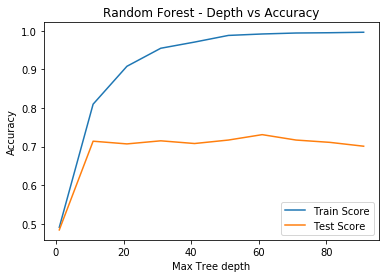

In [26]:
plt.plot(depth, train_score, label= 'Train Score')
plt.plot(depth, test_score, label= 'Test Score')
plt.legend()
plt.title('Random Forest - Depth vs Accuracy')
plt.xlabel('Max Tree depth')
plt.ylabel('Accuracy')
plt.savefig('../results/RandomForest_accuracy.png')

### Visually the optimum depth is ~ 40

In [27]:
randforest=RandomForestClassifier(n_estimators=25, max_depth=40)
randforest.fit(X_train, y_train)
print('The train score for Random Forest is {0}'.format(randforest.score(X_train,y_train)))
print('The test score for Random Forest is {0}'.format(randforest.score(X_test,y_test)))

The train score for Random Forest is 0.975
The test score for Random Forest is 0.72


In [28]:
data = np.array([['Model' , 'TrainScore', 'TestScore'],
               ['RandomForest', randforest.score(X_train,y_train),randforest.score(X_test,y_test)],
               ['MultinomialNB',clf_Multinomial.score(X_train,y_train), clf_Multinomial.score(X_test,y_test) ],
               ['BernoulliNB', clf_binary.score(X_train,y_train), clf_binary.score(X_test,y_test)],
               ['LogisticRegression', logisReg.score(X_train,y_train),logisReg.score(X_test,y_test)],
               ['LinearSVC', linSVC.score(X_train,y_train), linSVC.score(X_test,y_test)]])
pd.DataFrame(data[1:, :], columns=data[0,:])

,Model,TrainScore,TestScore
0,RandomForest,0.975,0.72
1,MultinomialNB,0.87075,0.745
2,BernoulliNB,0.76625,0.643
3,LogisticRegression,0.98425,0.729
4,LinearSVC,0.99675,0.688


### Evaluation Metrics : ConfusionMatrix

In [29]:
y_predict=randforest.predict(X_test);
conf_matrix=confusion_matrix(y_test,y_predict)
conf_matrix

array([[121,  50,  24,   7,   4],
       [ 66,  89,  24,   8,   6],
       [ 13,  18, 146,   6,  10],
       [  3,   3,   6, 186,  10],
       [  8,   2,   9,   3, 178]], dtype=int64)

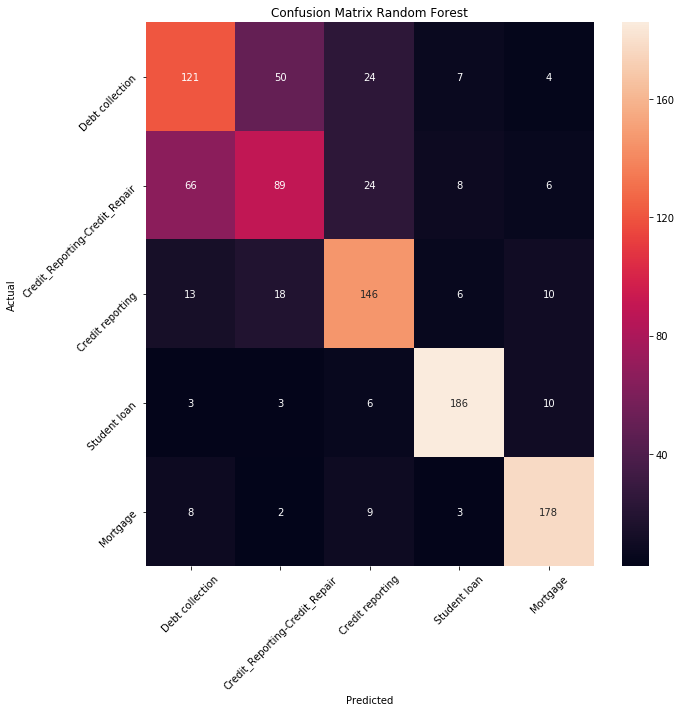

In [30]:
fig, ax = plt.subplots(figsize=(10,10));
sns.heatmap(conf_matrix,annot=True, fmt= 'd',
           xticklabels=consumer.Product.factorize()[1], yticklabels=consumer.Product.factorize()[1])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.yticks(rotation=45)
plt.xticks(rotation=45)
plt.title('Confusion Matrix Random Forest')
plt.tight_layout()
plt.savefig('../results/Confusion_Matrix_Heatmap_RandomForest.png')

In [31]:
y_predict=logisReg.predict(X_test);
conf_matrix=confusion_matrix(y_test,y_predict)
conf_matrix

array([[123,  58,  20,   4,   1],
       [ 61, 108,  19,   4,   1],
       [ 14,  23, 145,   4,   7],
       [  8,   5,   7, 184,   4],
       [  7,  10,  10,   4, 169]], dtype=int64)

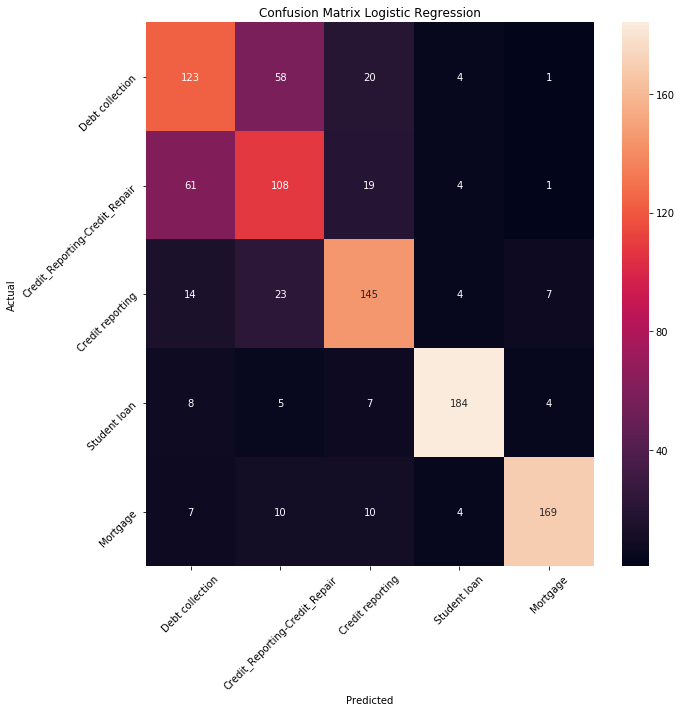

In [32]:
fig, ax = plt.subplots(figsize=(10,10));
sns.heatmap(conf_matrix,annot=True, fmt= 'd',
           xticklabels=consumer.Product.factorize()[1], yticklabels=consumer.Product.factorize()[1])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.yticks(rotation=45)
plt.xticks(rotation=45)
plt.title('Confusion Matrix Logistic Regression')
plt.tight_layout()
plt.savefig('../results/Confusion_Matrix_Heatmap_Logistic_Regression.png')